# Algerian Forest Fires Dataset

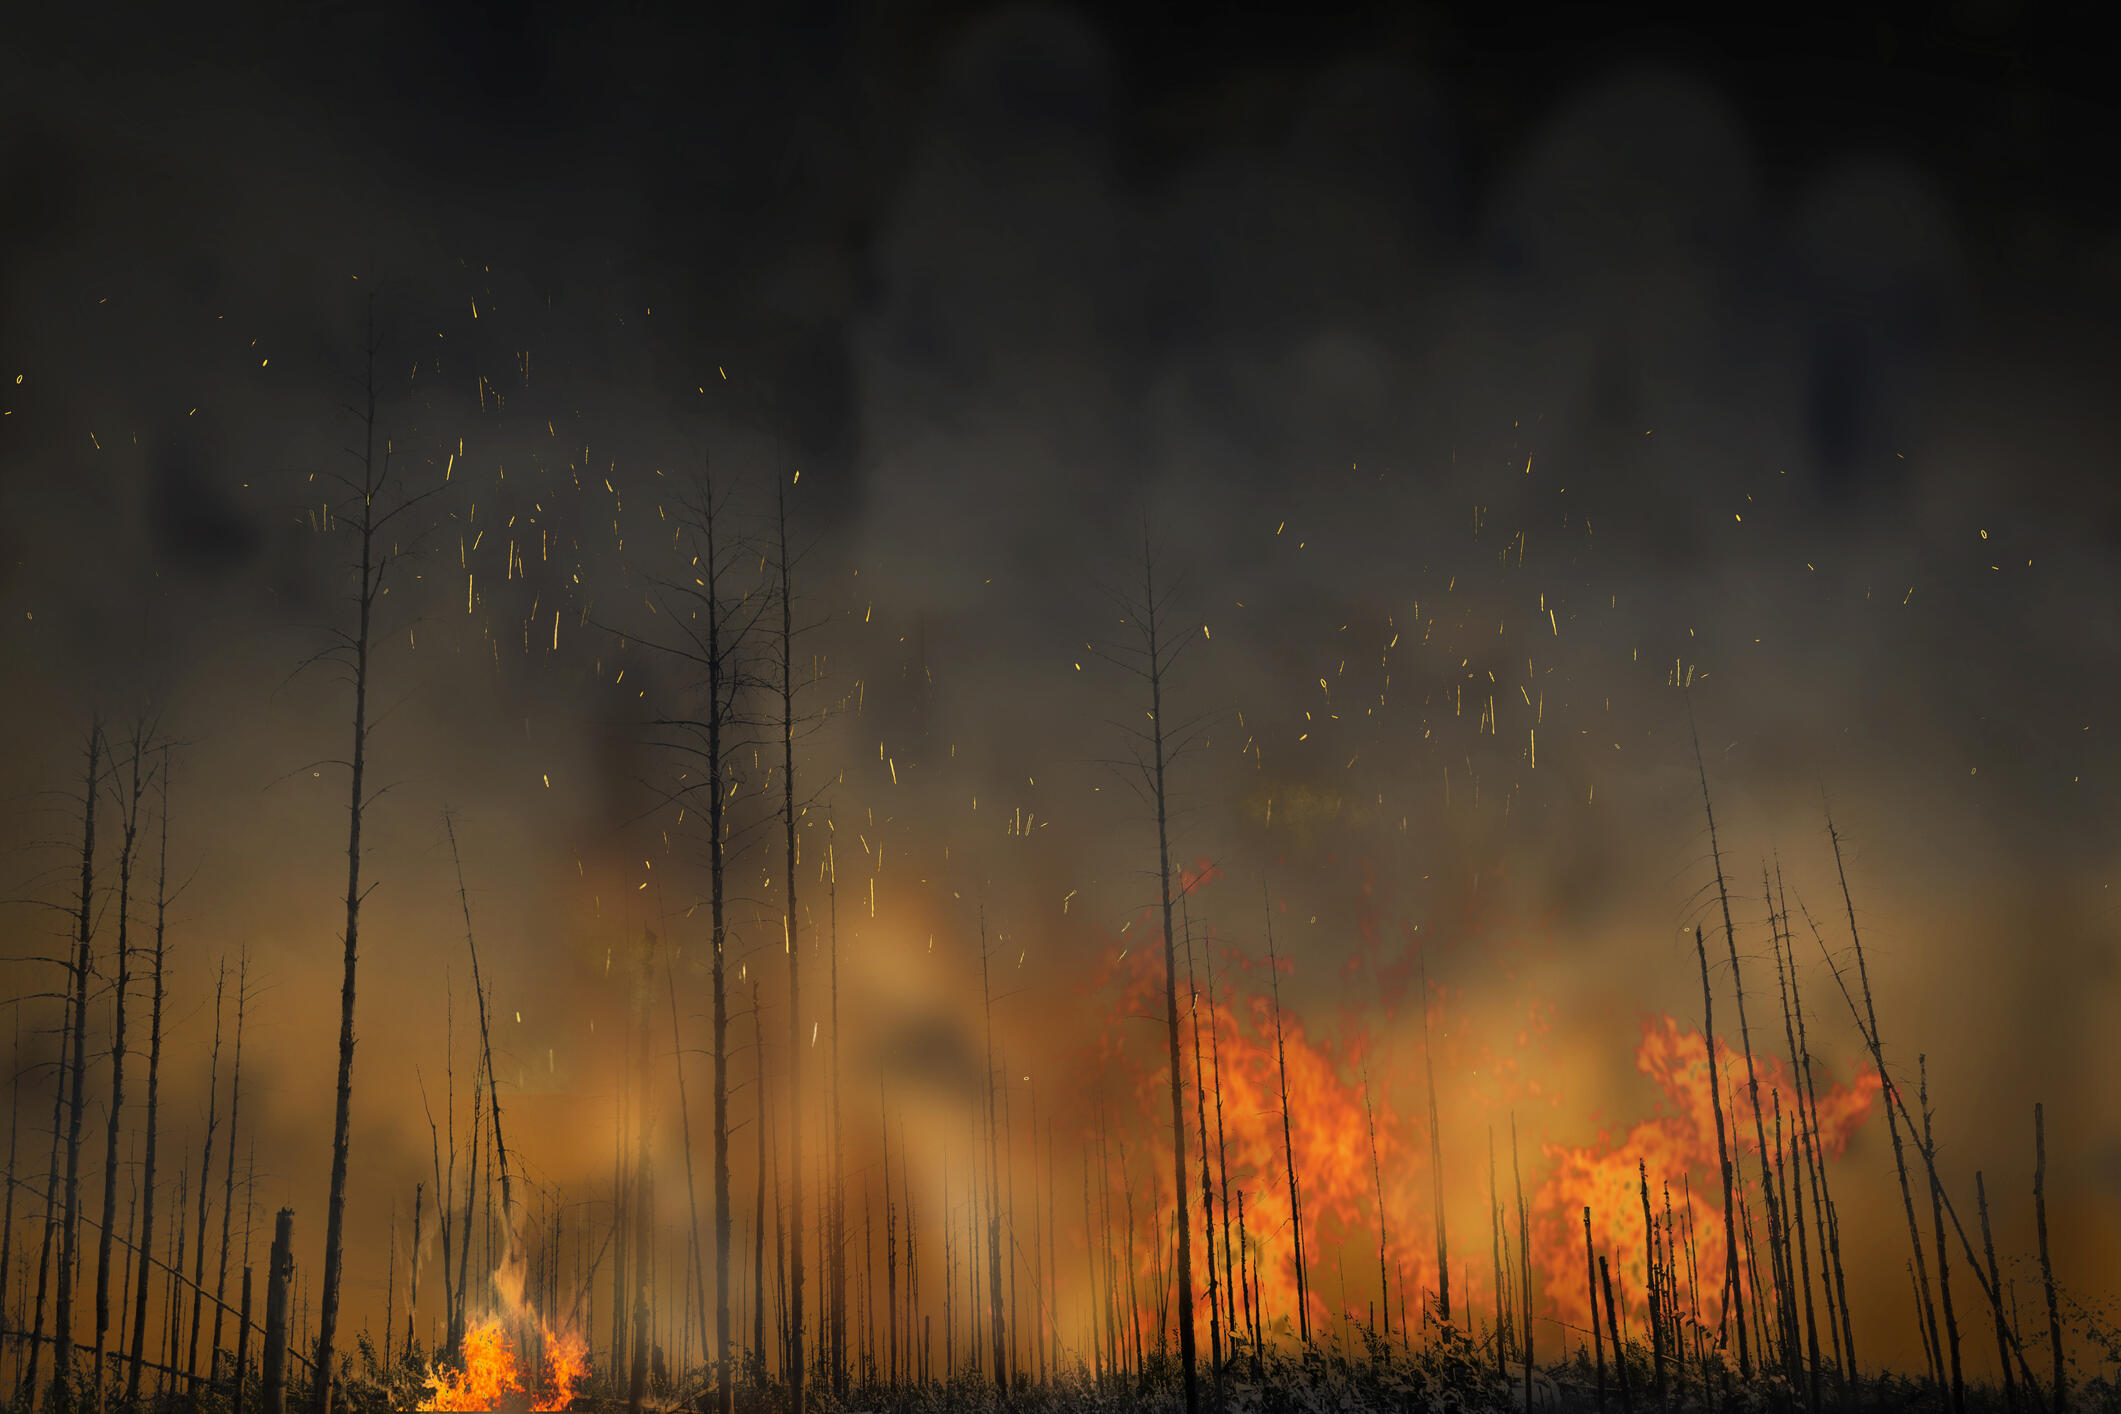

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import bz2,pickle

# Data Set Information:

In [ ]:
The dataset includes 244 instances that regroup a data of two regions of Algeria,
namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into "fire" (138 classes) and "not fire" (106 classes) classes.



# Importing Dataset

In [8]:
df = pd.read_csv("dataset\Algerian_forest_fires_dataset_UPDATE.csv", header=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exploratory Data Analysis

# Data Cleaning

In [9]:
df.drop(df.iloc[122:124].index, inplace=True) # removing rows
df.reset_index(inplace=True) #When we reset the index, the old index is added as a column, and a new sequential index is used
df.drop('index', axis=1, inplace=True) #We can use the drop parameter to avoid the old index being added as a column

In [6]:
#display first 5 rows of dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
# display last 5 rows of dataset
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [10]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [11]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    temp['duplicate_count'] =df.duplicated().sum() 
    return temp

In [10]:
printinfo()

,data_type,null_count,unique_count,duplicate_count
day,object,0,31,0
month,object,0,4,0
year,object,0,1,0
Temperature,object,0,19,0
RH,object,0,62,0
Ws,object,0,18,0
Rain,object,0,39,0
FFMC,object,0,173,0
DMC,object,0,166,0
DC,object,0,198,0


# Cleaning of the Data - Exploring and Managing the Data

In [12]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

In [13]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [14]:
df.Classes = df.Classes.str.strip() # stripping spaces from Classes feature

In [15]:
df.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

In [16]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [17]:
df['FWI'] = df.FWI.apply(lambda x: x.replace('fire', ''))# For replce the string fire with empty string from FWI attribute

In [18]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,,NaN,Sidi-Bel Abbes


In [19]:
df['FWI'] = df.FWI.replace(r'^\s*$', np.nan, regex=True) # replacing null value with NAN

In [20]:
modeValueRating = df['Classes'].mode() #relpace the class value with mode
df['Classes'].fillna(value=modeValueRating[0], inplace = True) 
df['FWI'].fillna(df['FWI'].median(), inplace = True) #relpace the FWI value with Median
df['DC'] = df.DC.apply(lambda x: x.replace(' ', '')) #relpace the blank space in DC

In [21]:
df.loc[165:165, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,4.2,fire,Sidi-Bel Abbes


In [ ]:
#df.dropna(inplace=True) #remove nan values

In [22]:
# changing dtypes to numerical

df = df.astype({'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

# Shape of the dataset

In [23]:
df.shape

(244, 15)

# Summary of the dataset

In [24]:
# Display summary statistics for a dataframe
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.02377
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.42746
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.00000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.70000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.20000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.37500
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.10000


# Check Datatypes in the dataset

In [25]:
printinfo()

,data_type,null_count,unique_count,duplicate_count
day,object,0,31,0
month,object,0,4,0
year,object,0,1,0
Temperature,int64,0,19,0
RH,int64,0,62,0
Ws,int64,0,18,0
Rain,float64,0,39,0
FFMC,float64,0,173,0
DMC,float64,0,166,0
DC,float64,0,198,0


In [26]:
df.to_csv('dataset\Algerian_forest_fire_cleaned-data.csv', index=False)

# EXPLORING DATA

In [25]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 5 categorical features : ['day', 'month', 'year', 'Classes', 'region']


In [ ]:
# feature information -
Day:(1 to 31), month: ('june' to 'september'), year: (2012) Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1
Classes: two classes, namely Fire and not Fire

# Univariate analysis

.The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

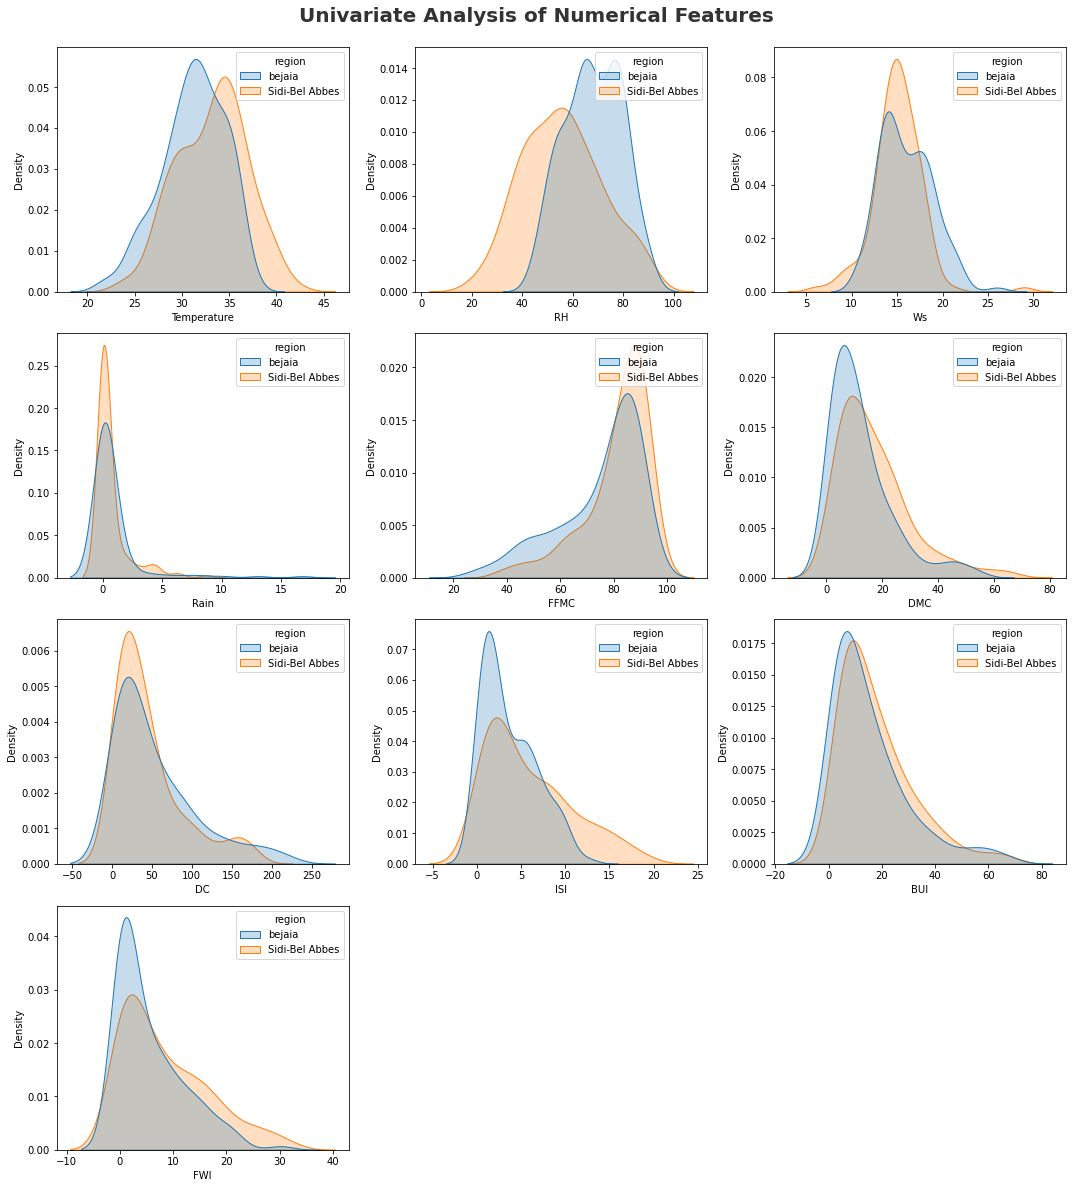

In [26]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b',hue='region',data=df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Report

Features like rain, dmc, dc, ISI, BUI, FWI follow log normal distribution (Right skewed) 
features like temperature , RH, WS follow normal distribution

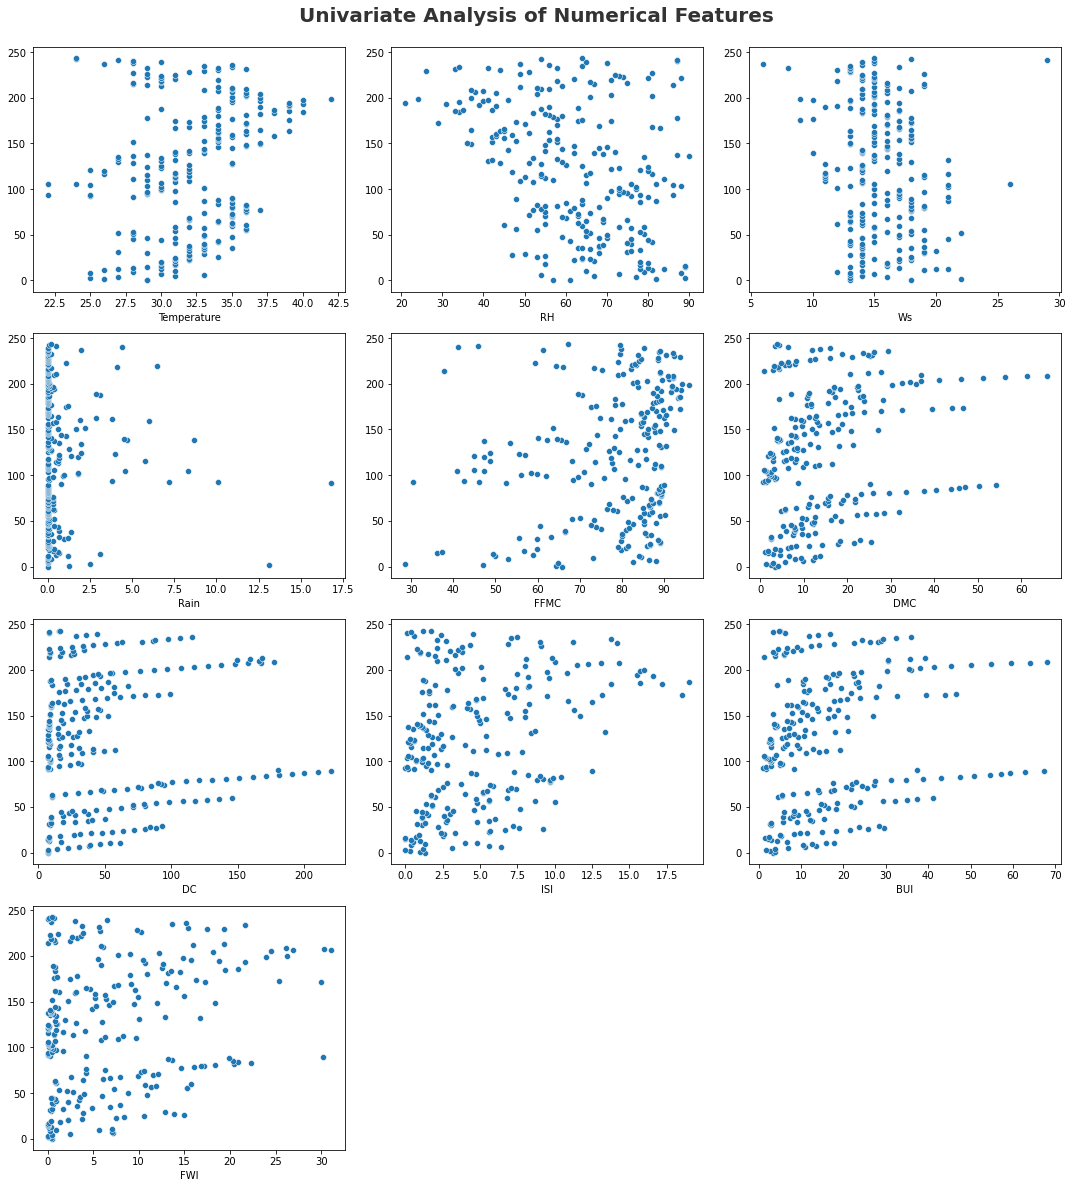

In [27]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=df[numeric_features[i]],y=df.index,data=df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
Extreme value of Temperature is above 40
Most of the time RH is above 30
WS values lie between 10 to 20

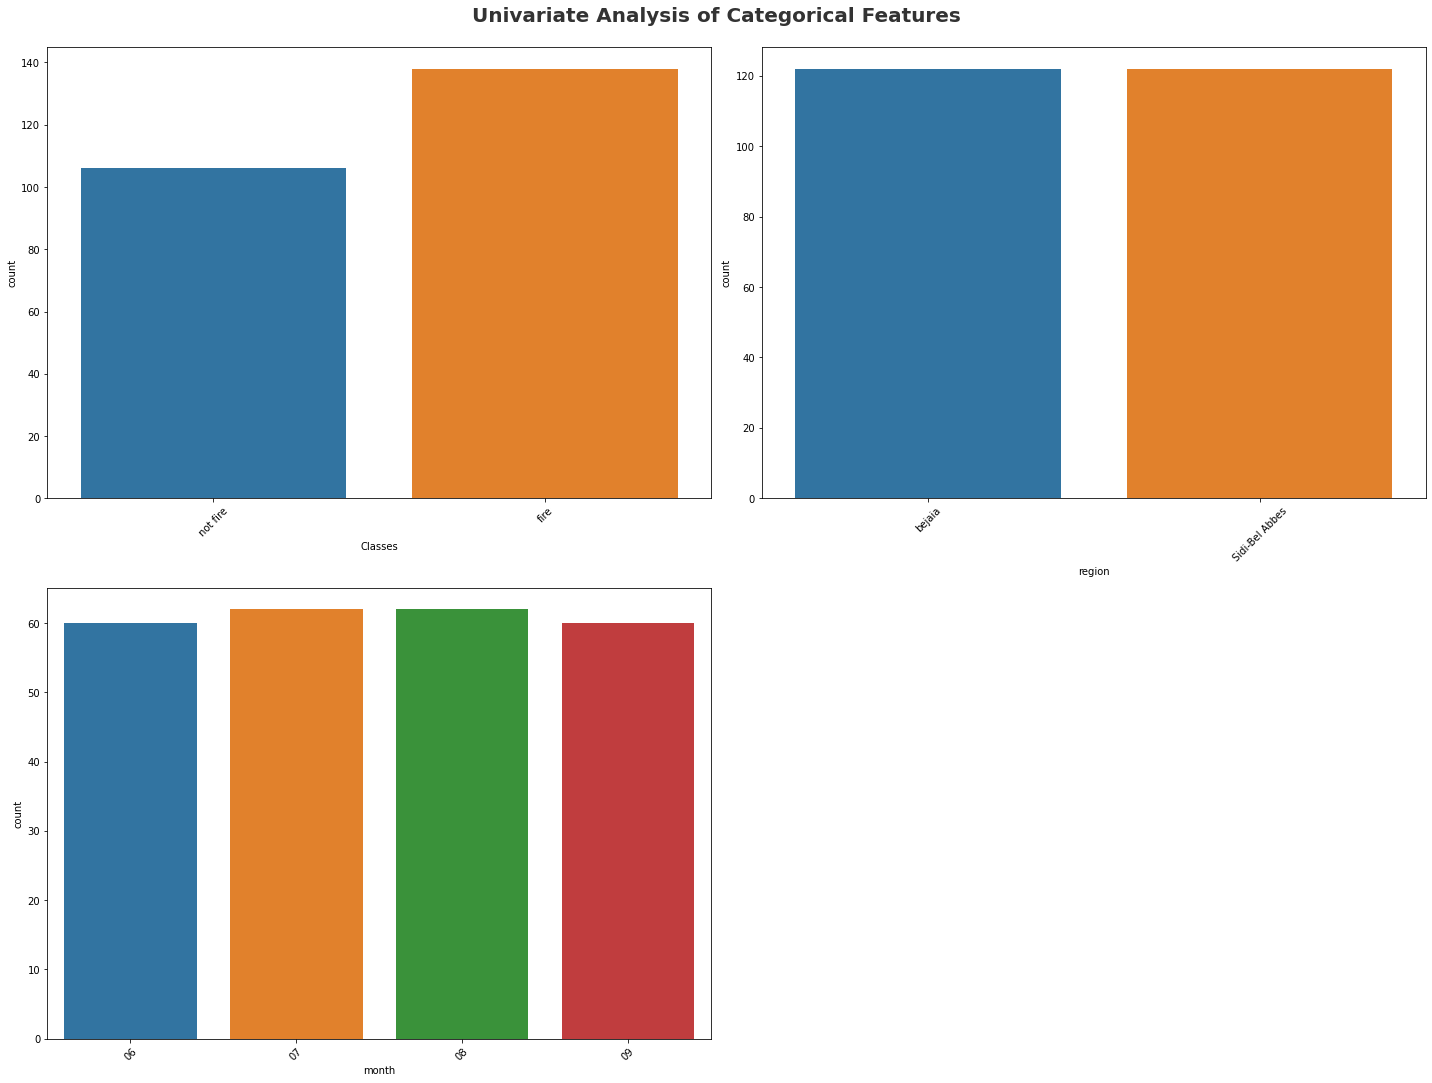

In [28]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Classes', 'region','month']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Report

In [ ]:
Most of the time, there is more fire.

# Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.

In [ ]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot/barplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

# Check Multicollinearity in Numerical features

In [29]:
df[numeric_features].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.858065
FWI,0.562344,-0.574773,0.030910,-0.323831,0.688876,0.875791,0.739634,0.913163,0.858065,1.000000


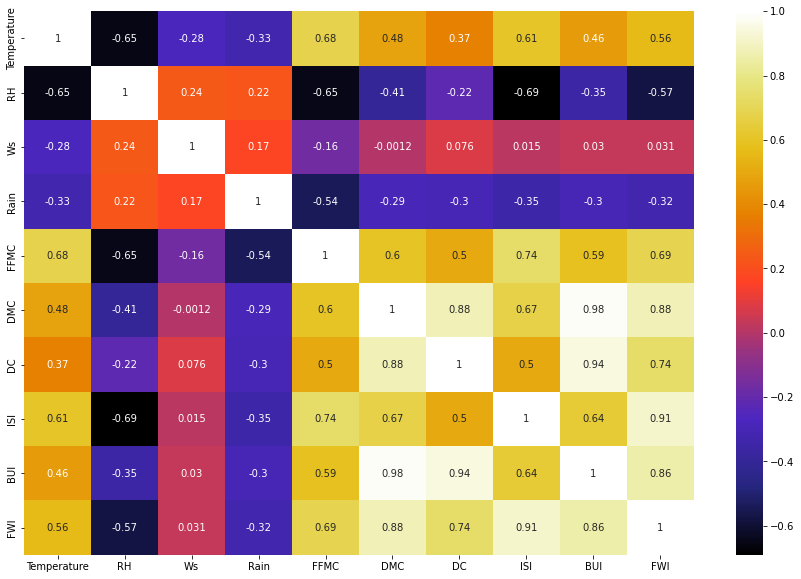

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(df[numeric_features].corr(), cmap="CMRmap", annot=True)
plt.show()

In [ ]:
# Report

Highly +ve correlated features are DMC and BUI, DC and BUI, ISI and FWI,DC and DMC
Highly -ve correlated features are RH and Temp, RH and FFMC, ISI and RH

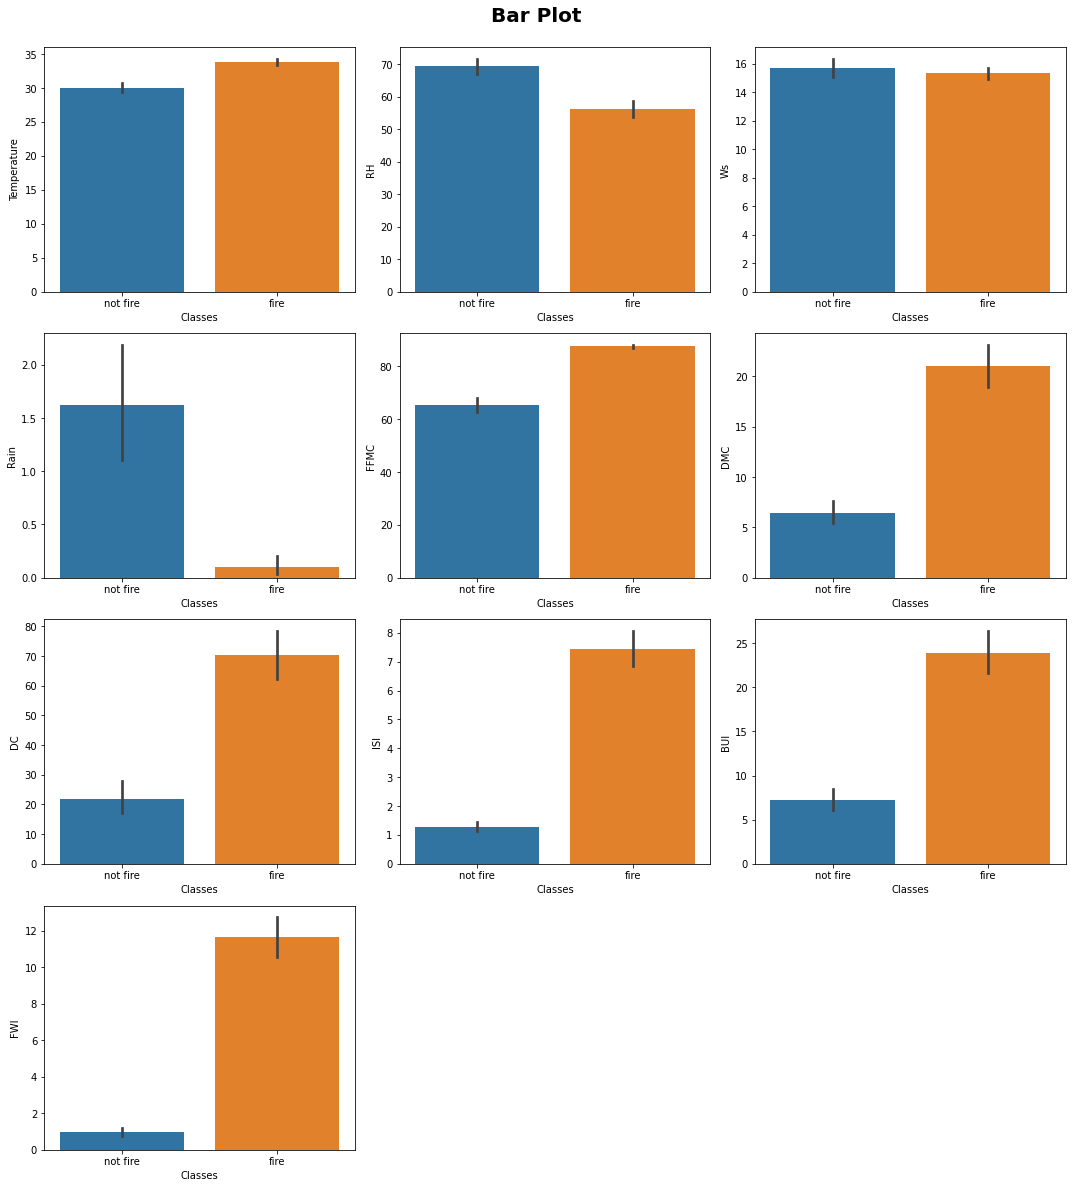

In [31]:
# Bar plot to see the relationship between numerical features and target


plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numeric_features[i], x='Classes', data=df)
    plt.tight_layout()

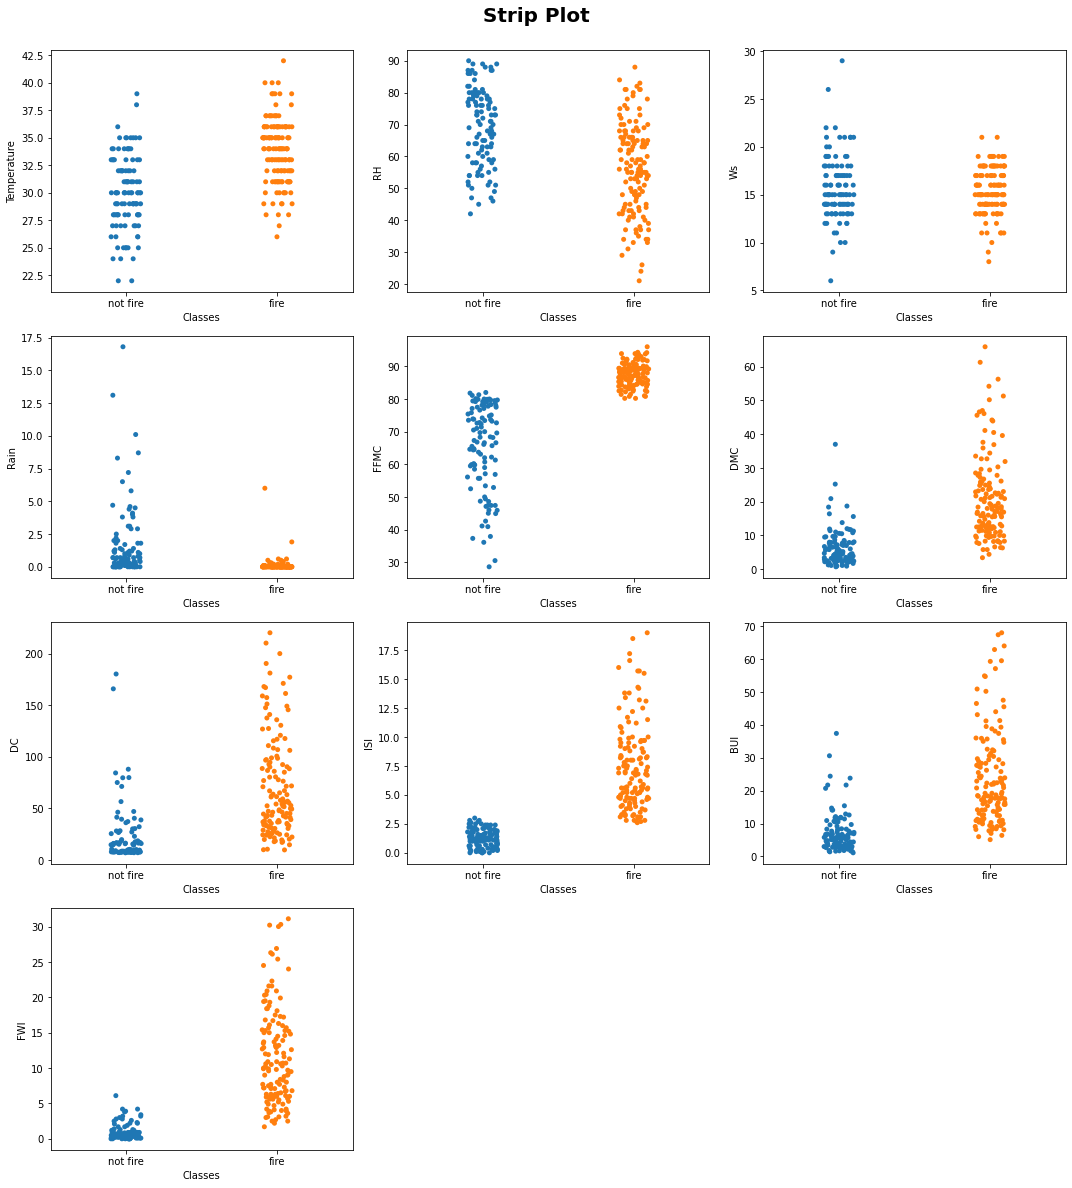

In [32]:
# strip plot to see the relationship between numerical features and target


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_features[i], x='Classes', data=df)
    plt.tight_layout()

In [ ]:
Report -
places with higher temperature has more fire
places with lower RH has fire
places wiht ffmc > 80 has fire
places wiht ISI > 2.5 has fire
places with FWI > 4 has fire
places with more rain has less fire

In [ ]:
'''# boxplot to find out ouliers in the features    
rows = 5
cols = 3
fig = plt.figure( figsize=(cols*5, rows*5))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)
for i, col in enumerate(numeric_features):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = col,orient='v', data=df, palette="Set1")
fig.tight_layout()  
plt.show()'''

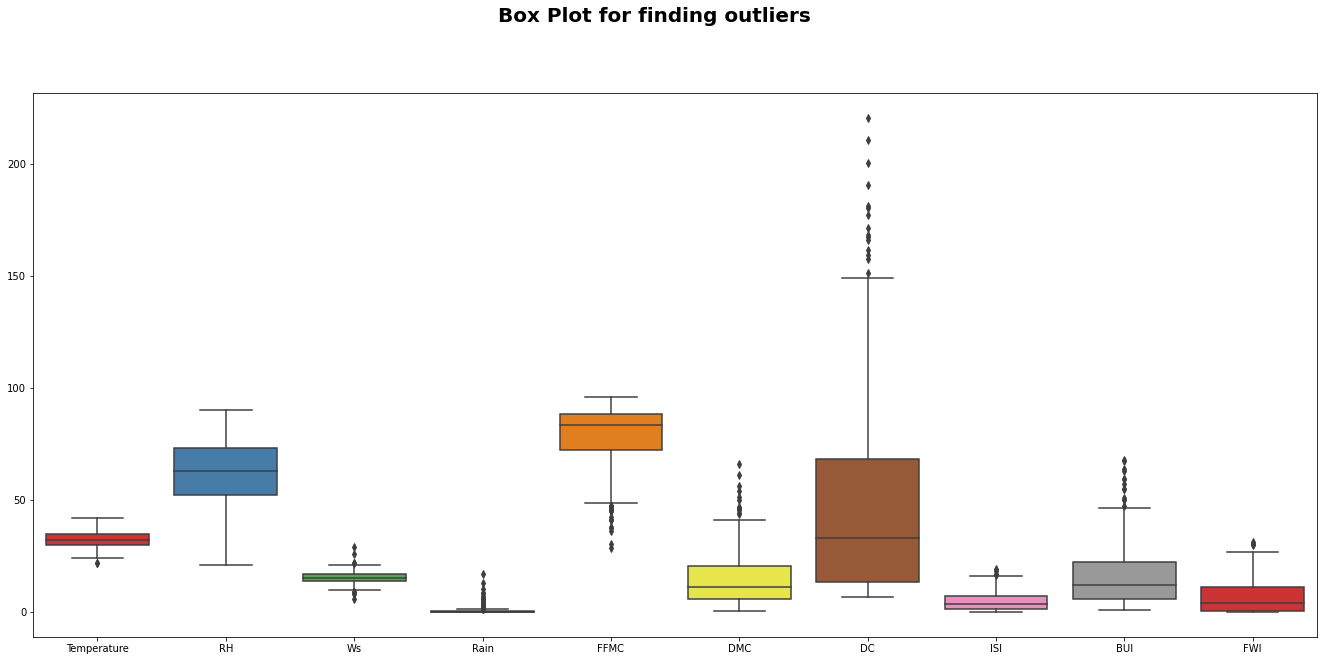

In [33]:
fig = plt.figure( figsize=(23, 10))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)
stud_bplt = sns.boxplot(orient='v', data=df[numeric_features], palette="Set1")
stud_bplt.plot()
plt.show()



# Report -

Rain , DC,DMC and BUI has many outlies which should be handled

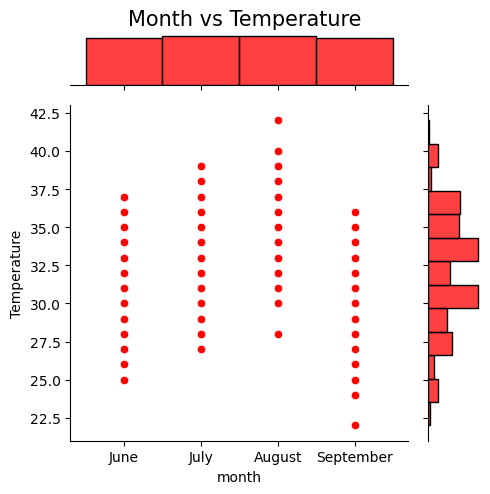

In [34]:
#JOINTPLOT

#Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.
#This plot is a convenience class that wraps JointGrid.
features = ['Temperature', 'month']
month_df = df[features]
month_labels = { '06': 'June', '07': 'July', '08': 'August','09': 'September'}
month_df['month']=month_df['month'].apply(lambda x: month_labels[x])
plt.style.use("default")
p=sns.jointplot(x='month',y='Temperature',data=month_df,color='r',height=5)
p.fig.suptitle("Month vs Temperature",fontsize=15)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.93)

# Report

In [ ]:
The highest Temperature is 42 degrees and it occured on the Month of August)

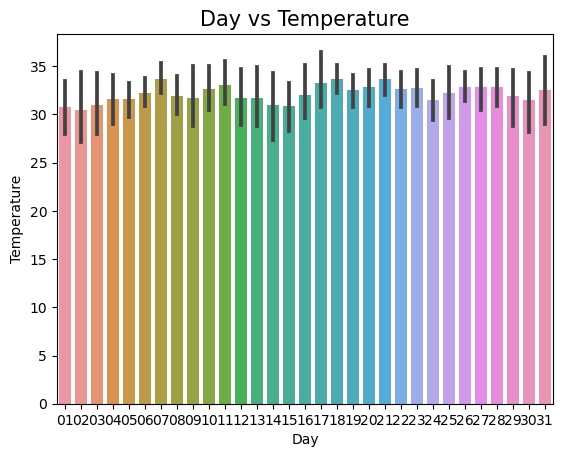

In [35]:
#Barplot
plt.style.use("default")
sns.barplot(x="day", y="Temperature",data=df)
plt.title("Day vs Temperature",fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

<AxesSubplot:title={'center':'Day vs Temperature'}, xlabel='Temperature', ylabel='day'>

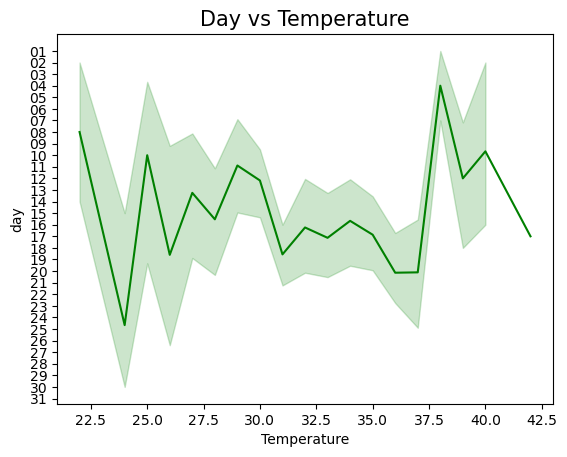

In [36]:
#LINEPLOT
#A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency
#of each value.
plt.title("Day vs Temperature",fontsize=15)
sns.lineplot(x='Temperature',y='day',data=df,color='g')

# Report

In [ ]:
The highest Temperature is occured on the Day of 17th

In [37]:
features = ['region', 'Classes']
region_df = df[features]
region_df

,region,Classes
0,bejaia,not fire
1,bejaia,not fire
2,bejaia,not fire
3,bejaia,not fire
4,bejaia,not fire
...,...,...
239,Sidi-Bel Abbes,fire
240,Sidi-Bel Abbes,not fire
241,Sidi-Bel Abbes,not fire
242,Sidi-Bel Abbes,not fire


In [38]:
region_group_df=region_df.groupby(['region','Classes']).agg({'Classes':['count']})
region_group_df

Classes
                          count
region         Classes         
Sidi-Bel Abbes fire          79
               not fire      43
bejaia         fire          59
               not fire      63

<AxesSubplot:ylabel='count'>

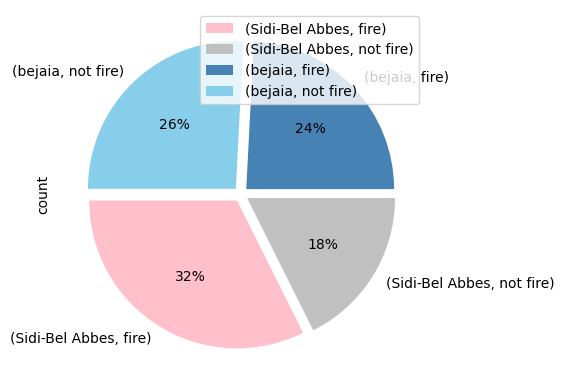

In [39]:
# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue','skyblue']
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
region_group_df.plot(kind='pie', y='Classes',autopct='%1.0f%%',colors=colors, explode=explode,startangle=180)
#note: https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

# Report -

according to observation Sidi-Bel Abbes has more fire compare to other region

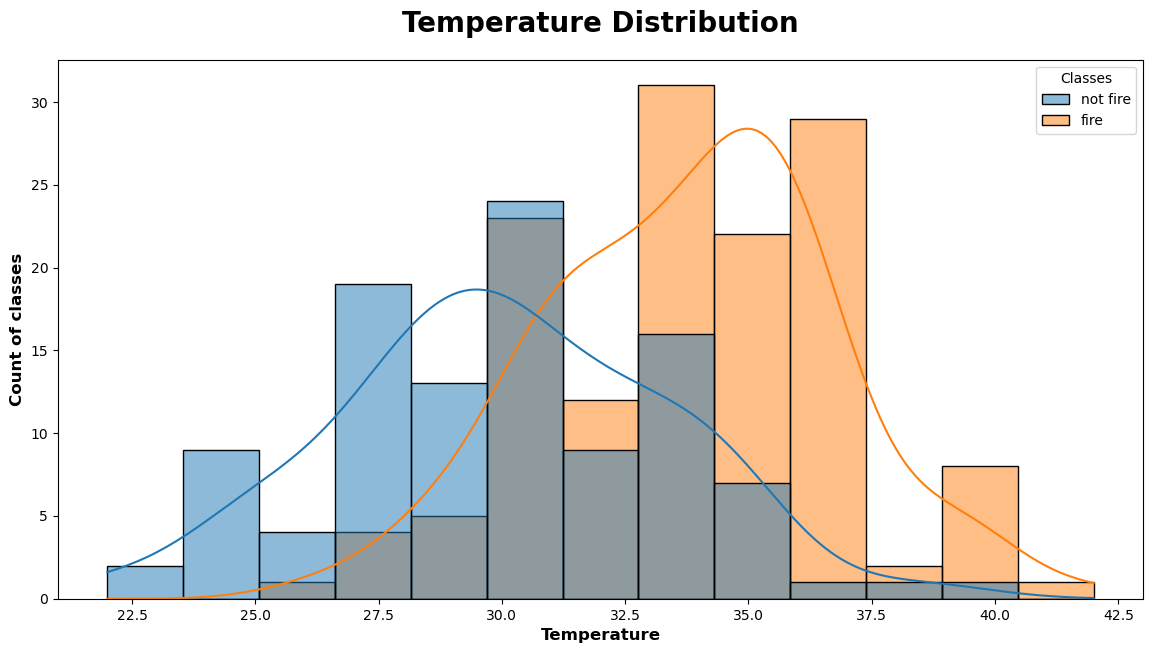

In [40]:
features = ['Temperature', 'Classes']
Temperature_df = df[features]
plt.subplots(figsize=(14,7))
sns.histplot( data=Temperature_df,x=Temperature_df['Temperature'], hue='Classes', color = 'g',kde=True)
#sns.histplot(Temperature_df.Temperature, color='g', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of classes", weight="bold", fontsize=12)
plt.xlabel("Temperature", weight="bold", fontsize=12)
plt.show()

In [ ]:
Most of the time fire occurred in between 32 to 37.5 degree

# Questions

In [41]:
#What is the highest temperature in the dataset
df.Temperature.max()

42

In [42]:
#What is the lowest temperature in the dataset
df.Temperature.min()

22

In [43]:
#When did it rain the most
#the 31st day in the 8th month with 16.8mm of rainfall
highest_rain = df.sort_values(by='Rain', ascending=False)[['Rain', 'day','month']].head(1)
highest_rain

,Rain,day,month
91,16.8,31,08


In [44]:
#What did it rain the least
#the 6th month with 0.0mm of rainfall
lowest_rain = df.sort_values(by='Rain', ascending=True)[['Rain', 'day', 'month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,01,06


In [45]:
#What month is the hottest
#the 8th month
highest_month = df.sort_values(by='Temperature', ascending=False)[['month']].head(1)
highest_month

,month
199,08


In [46]:
#what day has the highest temperature in the dataset?
#The highest Temperature is 42 degrees and it occured on the 17th of  the 8th Month).
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature','day','month']].head(1)
highest_temp

,Temperature,day,month
199,42,17,08


In [47]:
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature', 'day','month', 'Rain']].head(1)

lowest_temp =  df.sort_values(by='Temperature', ascending=True)[['Temperature', 'day','month', 'Rain']].head(1)

print("Highest Temperatures")
print(highest_temp)

print()

print("Lowest Temperatures")
print(lowest_temp)


Highest Temperatures
     Temperature day month  Rain
199           42  17    08   0.0

Lowest Temperatures
     Temperature day month  Rain
105           22  14    09   8.3


In [20]:
Algerian_dataset = pd.read_csv("dataset\Algerian_forest_fire_cleaned-data.csv")
Algerian_dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia


# Label Encoding

In [21]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes'. 
Algerian_dataset ['Classes']= label_encoder.fit_transform(Algerian_dataset ['Classes']) 
Algerian_dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,bejaia


In [22]:
Algerian_dataset.Classes.unique()

array([1, 0])

In [23]:
X = Algerian_dataset.iloc[:, 3:13]
y = Algerian_dataset['Classes']

In [34]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [24]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(170, 10) (74, 10)
(170,) (74,)


# Feature Scaling

In [25]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Standardisation = scaler.fit_transform(X_train)
    X_test_after_Standardisation = scaler.transform(X_test)
    return X_train_after_Standardisation, X_test_after_Standardisation

In [26]:
X_train_after_Standardisation, X_test_after_Standardisation = Feature_Scaling(X_train, X_test)

Text(0.5, 1.0, 'X_train After Standardisation')

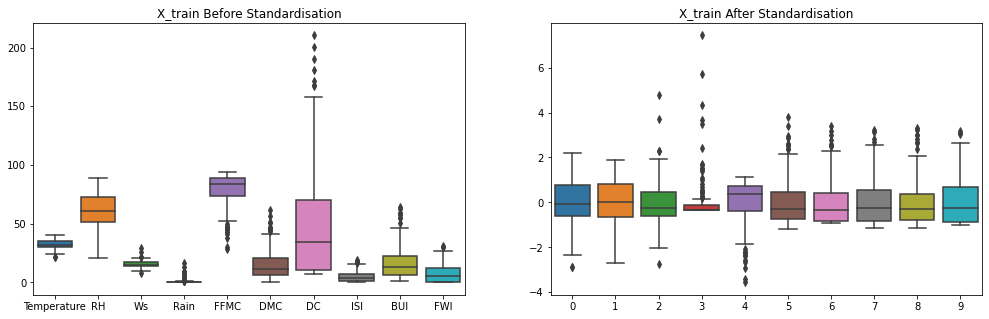

In [27]:
plt.subplots(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Standardisation')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_after_Standardisation)
plt.title('X_train After Standardisation')

# Model Building For Logistic Regression

In [28]:
# Import Logistic Regression to Train from SKlearn
Logistic_Regression  = LogisticRegression()
Logistic_Regression.fit(X_train_after_Standardisation,y_train)

LogisticRegression()

In [29]:
print('Intercept is :',Logistic_Regression.intercept_)
print('Coefficient is :',Logistic_Regression.coef_)

Intercept is : [-1.68985121]
Coefficient is : [[-0.06845507 -0.31989714  0.16367653 -0.40226189 -2.35805444 -0.24083105
  -0.14625589 -2.21304279 -0.19061393 -1.77245425]]


In [30]:
print("Training Score:",Logistic_Regression.score(X_train_after_Standardisation, y_train))
print("Test Score:",Logistic_Regression.score(X_test_after_Standardisation,y_test))

Training Score: 0.9705882352941176
Test Score: 0.9459459459459459


In [31]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test_after_Standardisation)
Logistic_Regression_Prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0])

In [32]:
accuracy = accuracy_score(y_test,Logistic_Regression_Prediction)
accuracy

0.9459459459459459

# Total count of matched and unmatched Record

In [33]:
Actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': Logistic_Regression_Prediction})    
Actual_predicted['Report']=abs(Actual_predicted['Actual']-Actual_predicted['Predicted'])
Actual_predicted['Classes']= np.where(Actual_predicted['Report']== 0,'Matched','Unmatched')
Actual_predicted_group_df=Actual_predicted.groupby(['Classes']).agg({'Classes':['count']})
Actual_predicted_group_df.reset_index()

Classes      
             count
0    Matched    70
1  Unmatched     4

# Classification Report

It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model. To understand the classification report of a machine learning model, you need to know all of the metrics displayed in the report. For a clear understanding, I have explained all of the metrics below so that you can easily understand the classification report of your machine learning model:

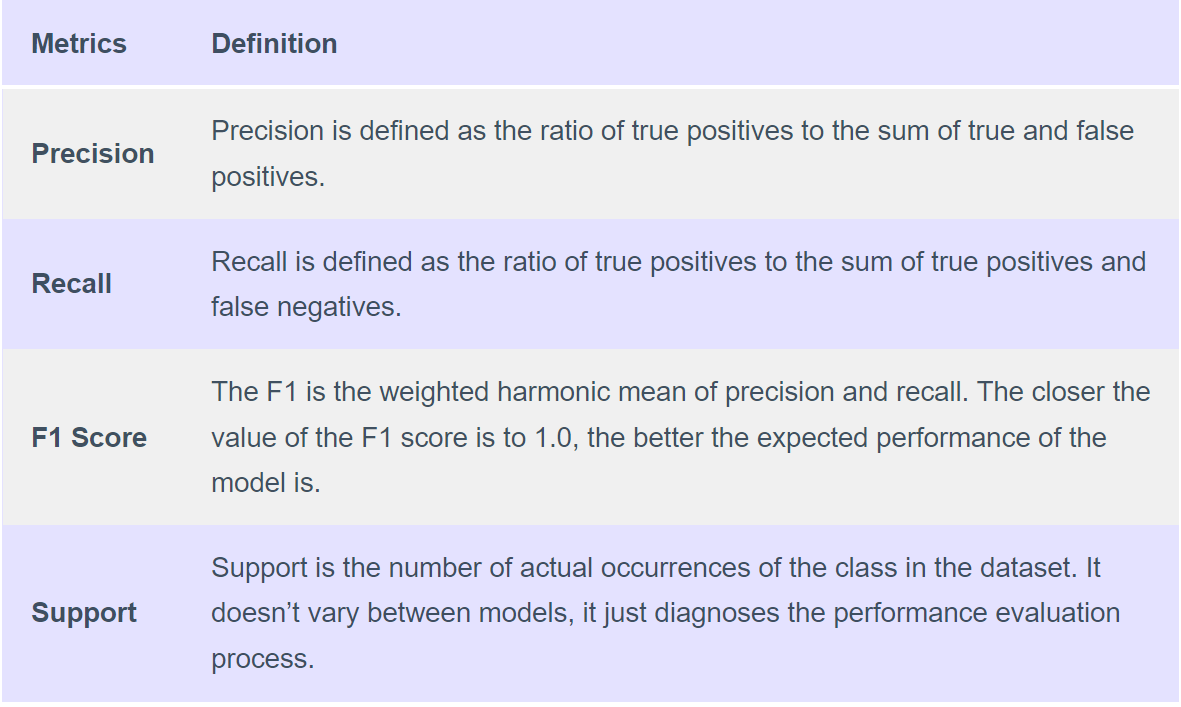

In [34]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9459
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.92      0.97      0.94        34

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



# Confusion Matrix

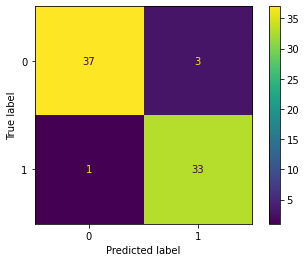

In [35]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression, X_test_after_Standardisation, y_test)
Logistic_Regression_Confusion_Matrix

In [36]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(Logistic_Regression,f)
